# **1. Importing the dataset and the necessary libraries, checking datatype, statistical summary, shape, null values etc.**

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
car=pd.read_csv('data.csv')

In [3]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
car.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
car.shape

(11914, 16)

In [6]:
car.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [7]:
car.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# **2 . I am dropping the Market Category column because it has very high number (3742) of null values and removing the null values would result in reduction of data significantly**




In [8]:
car.drop(['Market Category'], axis=1, inplace=True)



# 3 . Renaming the Columns 

In [9]:
car.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" }, inplace=True)

In [10]:
car.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# **4. Removing missing data and null values in the dataset**

In [11]:
car.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

Using Integer Encoder to encode string data types into numbers

In [12]:
lb_make = LabelEncoder()
car["Make"] = lb_make.fit_transform(car["Make"])
car["Model"] = lb_make.fit_transform(car["Model"])
car["Engine Fuel Type"] = lb_make.fit_transform(car["Engine Fuel Type"])
car["Transmission"] = lb_make.fit_transform(car["Transmission"])
car["Drive Mode"] = lb_make.fit_transform(car["Drive Mode"])
car["Vehicle Size"] = lb_make.fit_transform(car["Vehicle Size"])
car["Vehicle Style"] = lb_make.fit_transform(car["Vehicle Style"])

# **5. Plotting graphs of various columns to check for outliers**

In [13]:
y = car['Price']

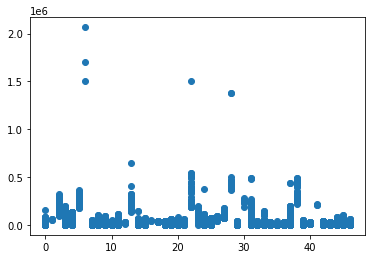

In [14]:
x = car['Make']

plt.scatter(x, y)
plt.show()

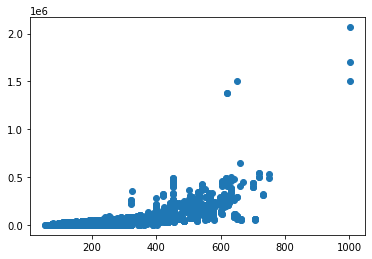

In [15]:
x = car['HP']

plt.scatter(x, y)
plt.show()

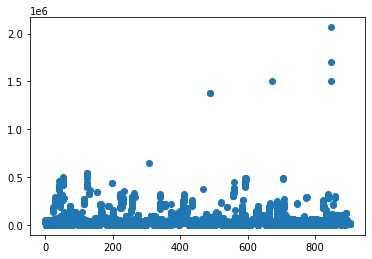

In [16]:
x = car['Model']

plt.scatter(x, y)
plt.show()

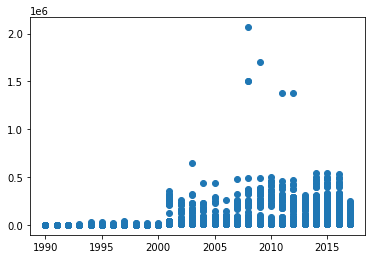

In [17]:
x = car['Year']

plt.scatter(x, y)
plt.show()

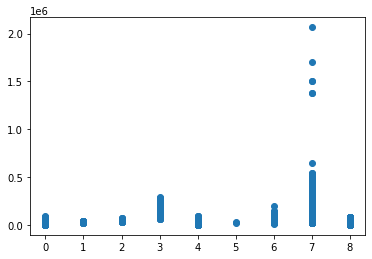

In [18]:
x = car['Engine Fuel Type']

plt.scatter(x, y)
plt.show()

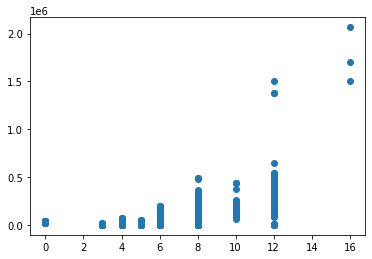

In [19]:
x = car['Cylinders']

plt.scatter(x, y)
plt.show()

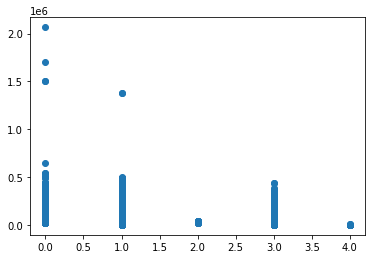

In [20]:
x = car['Transmission']

plt.scatter(x, y)
plt.show()

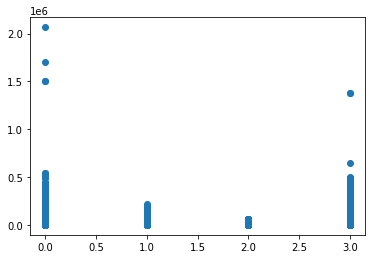

In [21]:
x = car['Drive Mode']

plt.scatter(x, y)
plt.show()

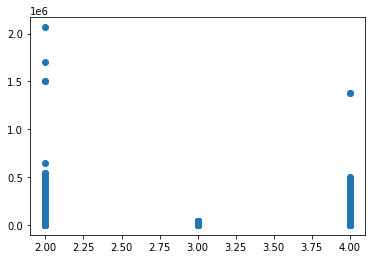

In [22]:
x = car['Number of Doors']

plt.scatter(x, y)
plt.show()

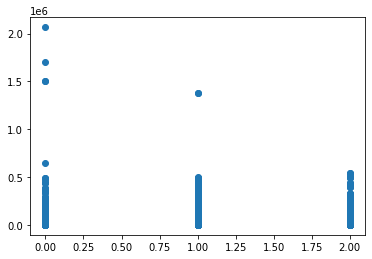

In [23]:
x = car['Vehicle Size']

plt.scatter(x, y)
plt.show()

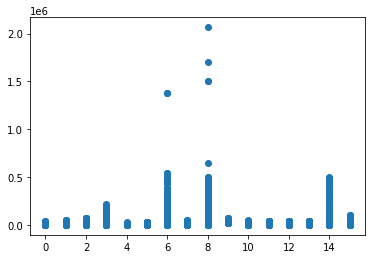

In [24]:
x = car['Vehicle Style']

plt.scatter(x, y)
plt.show()

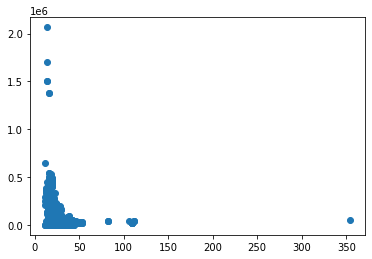

In [25]:
x = car['MPG-H']

plt.scatter(x, y)
plt.show()

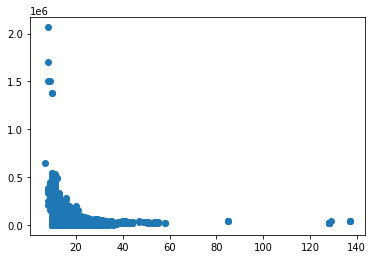

In [26]:
x = car['MPG-C']

plt.scatter(x, y)
plt.show()

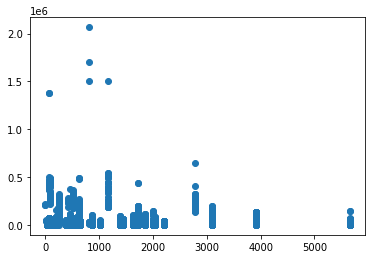

In [27]:
x = car['Popularity']

plt.scatter(x, y)
plt.show()

**By analysing the graphs, we find that there are about 13 to 15 points that are outliers**

Now identifying outliers and removing them

In [28]:
index = car[(car['HP'] >= 800)].index
print(index)


Int64Index([11362, 11363, 11364], dtype='int64')


In [29]:
car.drop(labels=None, axis=0, index=[11363,11362,11364], columns=None, level=None, inplace=True, errors='raise')

In [30]:
index = car[(car['MPG-C'] >= 120)].index
print(index)

Int64Index([5790, 5791, 5792, 5793, 9867, 9868, 9869, 9870, 9871, 9872], dtype='int64')


In [31]:
car.drop(labels=None, axis=0, index=[5790, 5791, 5792, 5793, 9867, 9868, 9869, 9870, 9871, 9872], columns=None, level=None, inplace=True, errors='raise')

In [32]:
y = car['Price']

# **6. car brands are the most represented in the dataset and finding the average price among the top car brands**

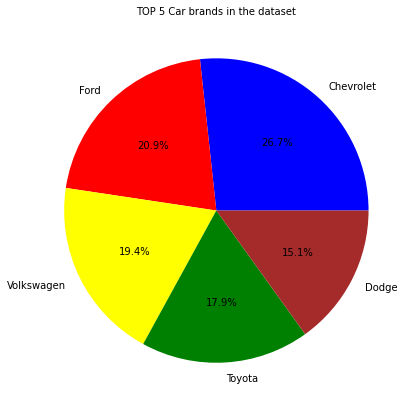

In [33]:
carr=car['Make'].value_counts().head(5).to_frame()
m= carr.style.background_gradient(cmap='Blues')
colors=['blue','red','yellow','green','brown']
labels= ['Chevrolet','Ford','Volkswagen','Toyota','Dodge']
sizes= ['1123','881','809','746','626']
explode=[0.1,0.1,0.1,0.1,0.1]
values=car['Make'].value_counts().head(5).to_frame()

plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()


Chevrolet, Ford, Volkswagen, Toyota and Dodge are the brands most present in our dataset.

In [34]:
car1=pd.read_csv('data.csv')
car1['Make'].value_counts()[:6]

Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Nissan         558
Name: Make, dtype: int64

The average prices :

In [35]:

mean_cr = car1['MSRP'].groupby(car1['Make']) 

print(mean_cr.mean())     

Make
Acura            3.488759e+04
Alfa Romeo       6.160000e+04
Aston Martin     1.979104e+05
Audi             5.345211e+04
BMW              6.154676e+04
Bentley          2.471693e+05
Bugatti          1.757224e+06
Buick            2.820661e+04
Cadillac         5.623132e+04
Chevrolet        2.835039e+04
Chrysler         2.672296e+04
Dodge            2.239006e+04
FIAT             2.267024e+04
Ferrari          2.382188e+05
Ford             2.739927e+04
GMC              3.049330e+04
Genesis          4.661667e+04
HUMMER           3.646441e+04
Honda            2.667434e+04
Hyundai          2.459704e+04
Infiniti         4.239421e+04
Kia              2.531017e+04
Lamborghini      3.315673e+05
Land Rover       6.782322e+04
Lexus            4.754907e+04
Lincoln          4.283983e+04
Lotus            6.918828e+04
Maserati         1.142077e+05
Maybach          5.462219e+05
Mazda            2.003938e+04
McLaren          2.398050e+05
Mercedes-Benz    7.147623e+04
Mitsubishi       2.124054e+04
Nissa

# **7. The correlation matrix and insights**

In [36]:
car.corr()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
Make,1.000000,0.034545,-0.017078,0.126892,-0.226404,-0.265650,0.044212,-0.036289,0.055963,-0.105155,-0.061020,0.146869,0.213763,-0.300520,-0.112780
Model,0.034545,1.000000,0.030669,0.016320,0.002038,0.074253,-0.077897,-0.074956,0.137651,0.023728,-0.092115,-0.159069,-0.102440,-0.072610,-0.045250
Year,-0.017078,0.030669,1.000000,-0.264947,0.356177,-0.032501,-0.364420,-0.184318,0.262149,0.105108,-0.067346,0.289534,0.256614,0.073185,0.258052
Engine Fuel Type,0.126892,0.016320,-0.264947,1.000000,-0.231738,-0.134865,0.141825,0.028965,0.016675,-0.067037,-0.049534,-0.014570,0.043130,-0.045714,-0.150527
HP,-0.226404,0.002038,0.356177,-0.231738,1.000000,0.778938,-0.236548,-0.030854,-0.099306,0.210455,0.012182,-0.428920,-0.522513,0.038018,0.692842
Cylinders,-0.265650,0.074253,-0.032501,-0.134865,0.778938,1.000000,-0.158848,0.093043,-0.134698,0.194471,0.030516,-0.626797,-0.684944,0.047855,0.568569
Transmission,0.044212,-0.077897,-0.364420,0.141825,-0.236548,-0.158848,1.000000,0.171539,-0.339028,-0.303722,-0.033365,0.022941,0.025471,0.011223,-0.192125
Drive Mode,-0.036289,-0.074956,-0.184318,0.028965,-0.030854,0.093043,0.171539,1.000000,-0.257026,-0.130589,0.103185,-0.009087,-0.031437,0.027964,-0.026988
Number of Doors,0.055963,0.137651,0.262149,0.016675,-0.099306,-0.134698,-0.339028,-0.257026,1.000000,0.270153,0.204084,0.120855,0.146121,-0.050442,-0.130014
Vehicle Size,-0.105155,0.023728,0.105108,-0.067037,0.210455,0.194471,-0.303722,-0.130589,0.270153,1.000000,0.162653,-0.102408,-0.161566,-0.004234,0.050051


Heatmap for correlation matrix

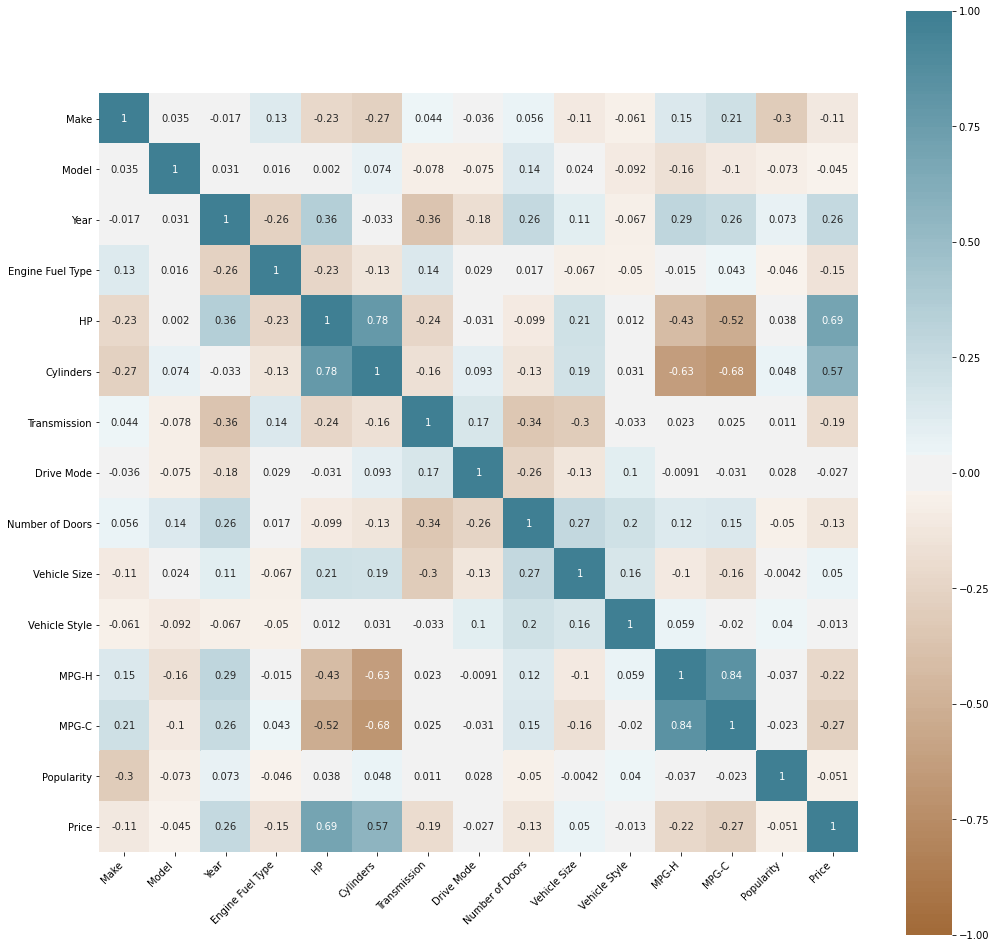

In [37]:
corr = car.corr()
plt.figure(figsize=(17, 17))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(40, 220, n=200),square=True,annot=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### **Insights on correlation matrix and its heatmap**


Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


Simply put it gives extreme colors to extreme values so they are easily visible to the naked eye.

### **So we can say there is a positive correlation between:**

Engine HP and Engine Cylinders
Engine HP and the manufacturer's suggested retail price (MSRP)
Engine Cylinders and the manufacturer's suggested retail price (MSRP) 

# **8. EDA and plots of different graphs and findings**

* Let's plot the graphs to have a better understading of these correlations.

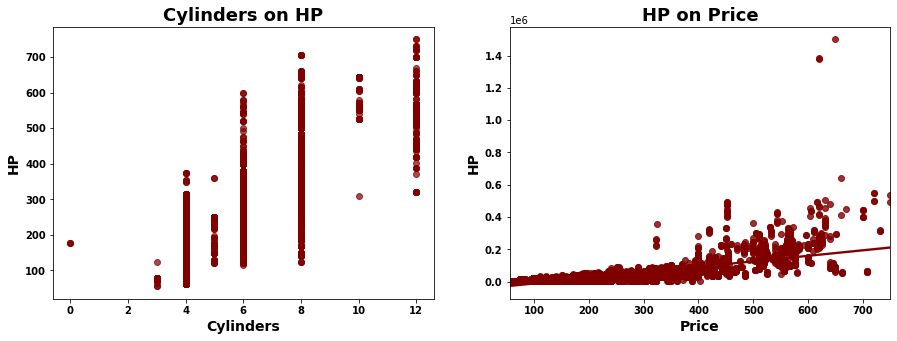

In [41]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=car['Cylinders'], y=car['HP'], color='maroon', alpha=0.7)
plt.title('Cylinders on HP', weight='bold', fontsize=18)
plt.xlabel('Cylinders', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')



ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car['HP'], y=car['Price'], color='maroon')
plt.title('HP on Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.show()

  An engine with more cylinders produces more power, and more power means a high Price.

                  3.- Shouldn't cars with a high engine power produce more power and thus have a high highway and city mpg?
                  
         

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

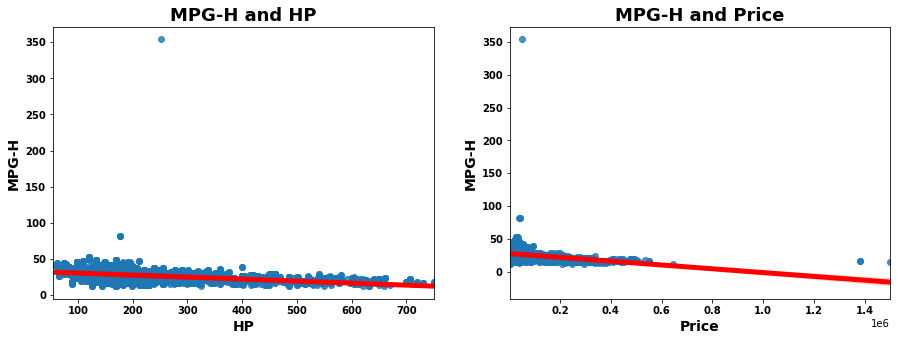

In [42]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.regplot(x=car["HP"], y=car["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and HP', weight='bold', fontsize=18)
plt.xlabel('HP', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


ax1 = plt.subplot2grid((1,2), (0, 1))
sns.regplot(x=car["Price"], y=car["MPG-H"], line_kws={"color":"red","alpha":1,"lw":5})
plt.title('MPG-H and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('MPG-H', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')

  - Shouldn't cars with a high engine power produce more power and thus have a high highway and city mpg?
  
From both the heatmap and the plots above, we can see a negative correlation between highway and city mpg ( how far the car is able to travel for every gallon of fuel it uses in the highway and around the city) and the Engine HP. 


Horsepower is a measure of **work** that can be performed over a given **time** by an engine. The more power you have the higher the speed you can do it at during **a period of time**. Generally, **higher horsepower** comes from burning more fuel, so get **lower mpg**, more horsepower means less fuel economy.

 

* How are other features correlated to the manufacturer's suggested Price?

In [43]:
car.dtypes

Make                  int64
Model                 int64
Year                  int64
Engine Fuel Type      int64
HP                  float64
Cylinders           float64
Transmission          int64
Drive Mode            int64
Number of Doors     float64
Vehicle Size          int64
Vehicle Style         int64
MPG-H                 int64
MPG-C                 int64
Popularity            int64
Price                 int64
dtype: object

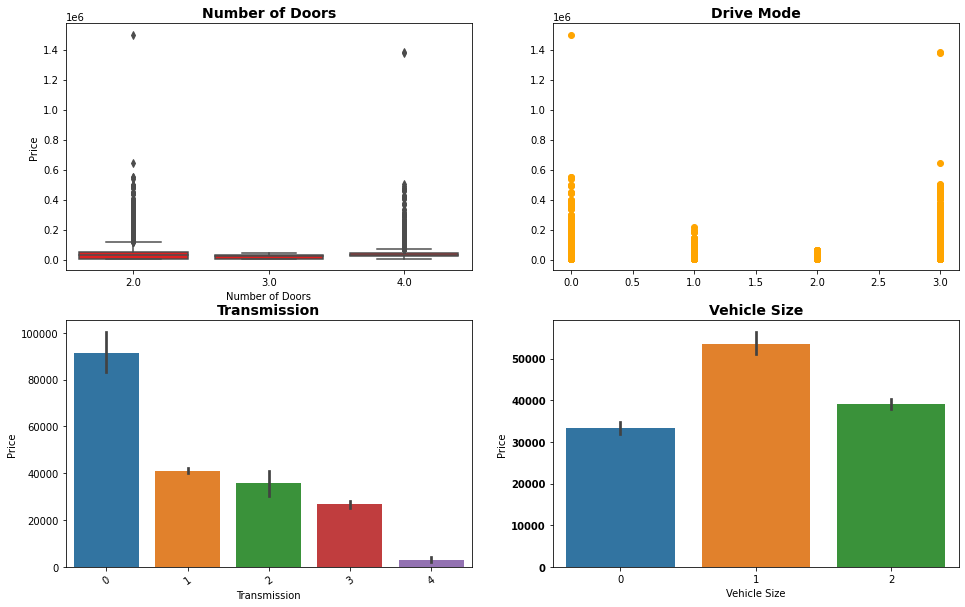

In [44]:

fig= plt.figure(figsize=(16,10))

ax1 = plt.subplot2grid((2,2),(0,0))
sns.boxplot(x=car['Number of Doors'], y=car['Price'],color='Red')
plt.title('Number of Doors', weight='bold', fontsize=14)


ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(x=car['Drive Mode'], y=car['Price'], color='Orange')
plt.title('Drive Mode', weight='bold', fontsize=14)



ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=car['Transmission'], y=car['Price'])
plt.xticks(rotation=35)
plt.title('Transmission', weight='bold', fontsize=14)


ax1 = plt.subplot2grid((2,2), (1, 1))
sns.barplot(x=car['Vehicle Size'], y=car['Price'])

plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)


plt.show()

What contribute to a High Price :

      - Number of doors : Cars with 2 doors 
      - Drive Mode : All wheel drive      
      - Transmission: Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)        
      - Vehicle Size: Large  

In [46]:
EFT=car[['Engine Fuel Type',
      'HP',
      'Cylinders',
      'MPG-H',
         'Price',
        'MPG-C']].groupby(['Engine Fuel Type']).agg('median').sort_values(by=['HP'],ascending=False)
EFT1= EFT.style.background_gradient(cmap='Purples')
EFT1


,HP,Cylinders,MPG-H,Price,MPG-C
Engine Fuel Type,,,,,
3,510.000000,8.000000,19.000000,142547.500000,13.000000
7,333.000000,6.000000,24.000000,60625.000000,17.000000
4,285.000000,6.000000,22.000000,34405.000000,17.000000
6,248.000000,4.000000,29.000000,36975.000000,21.000000
2,220.000000,4.000000,27.500000,44080.000000,18.000000
8,185.000000,6.000000,26.000000,23605.000000,19.000000
1,177.000000,0.000000,82.000000,41450.000000,85.000000
0,150.000000,4.000000,39.000000,38590.000000,28.000000
5,110.000000,4.000000,38.000000,28065.000000,27.000000


Cars with the Engine Fuel Type 'ELECTRIC' have 0 Engine Cylinders since they have an electric motor and don't rely on engine cylinders to  generate power. 

Moreover, the electric motor is more efficient than internal combustion engines and save a high proportion of the fuel which explains why electric cars have a very high miles per gallon (mpg) value.


* High numbers of Engine Cylinders produce Higher Engine Horsepower.
* High Engine Horsepower means a High Price and a low MPG value ( example: Chevrolet brand/ Corvette model)
* Cars with an Electric Engine fuel type ( electric motors instead of engine cylinders tend to be very fuel economy and have a high mpg values 
* Cars with : 2 doors - all wheel drive - large size - Automated manual transmission size and Convertible Style mark a high MSRP Values.

